<a href="https://colab.research.google.com/github/beggy22/Regresion__Lineal-python-template/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Analisis exploratorio



*   Planteamiento del problema y recopilacion de datos



In [4]:
import pandas as pd


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

Tiene 7 variables y 1338 filas

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No contiene valores perdidos y esta formado por 3 variables categoricas y 4 numericas



*   Analisis univariable





1.   Categoricas



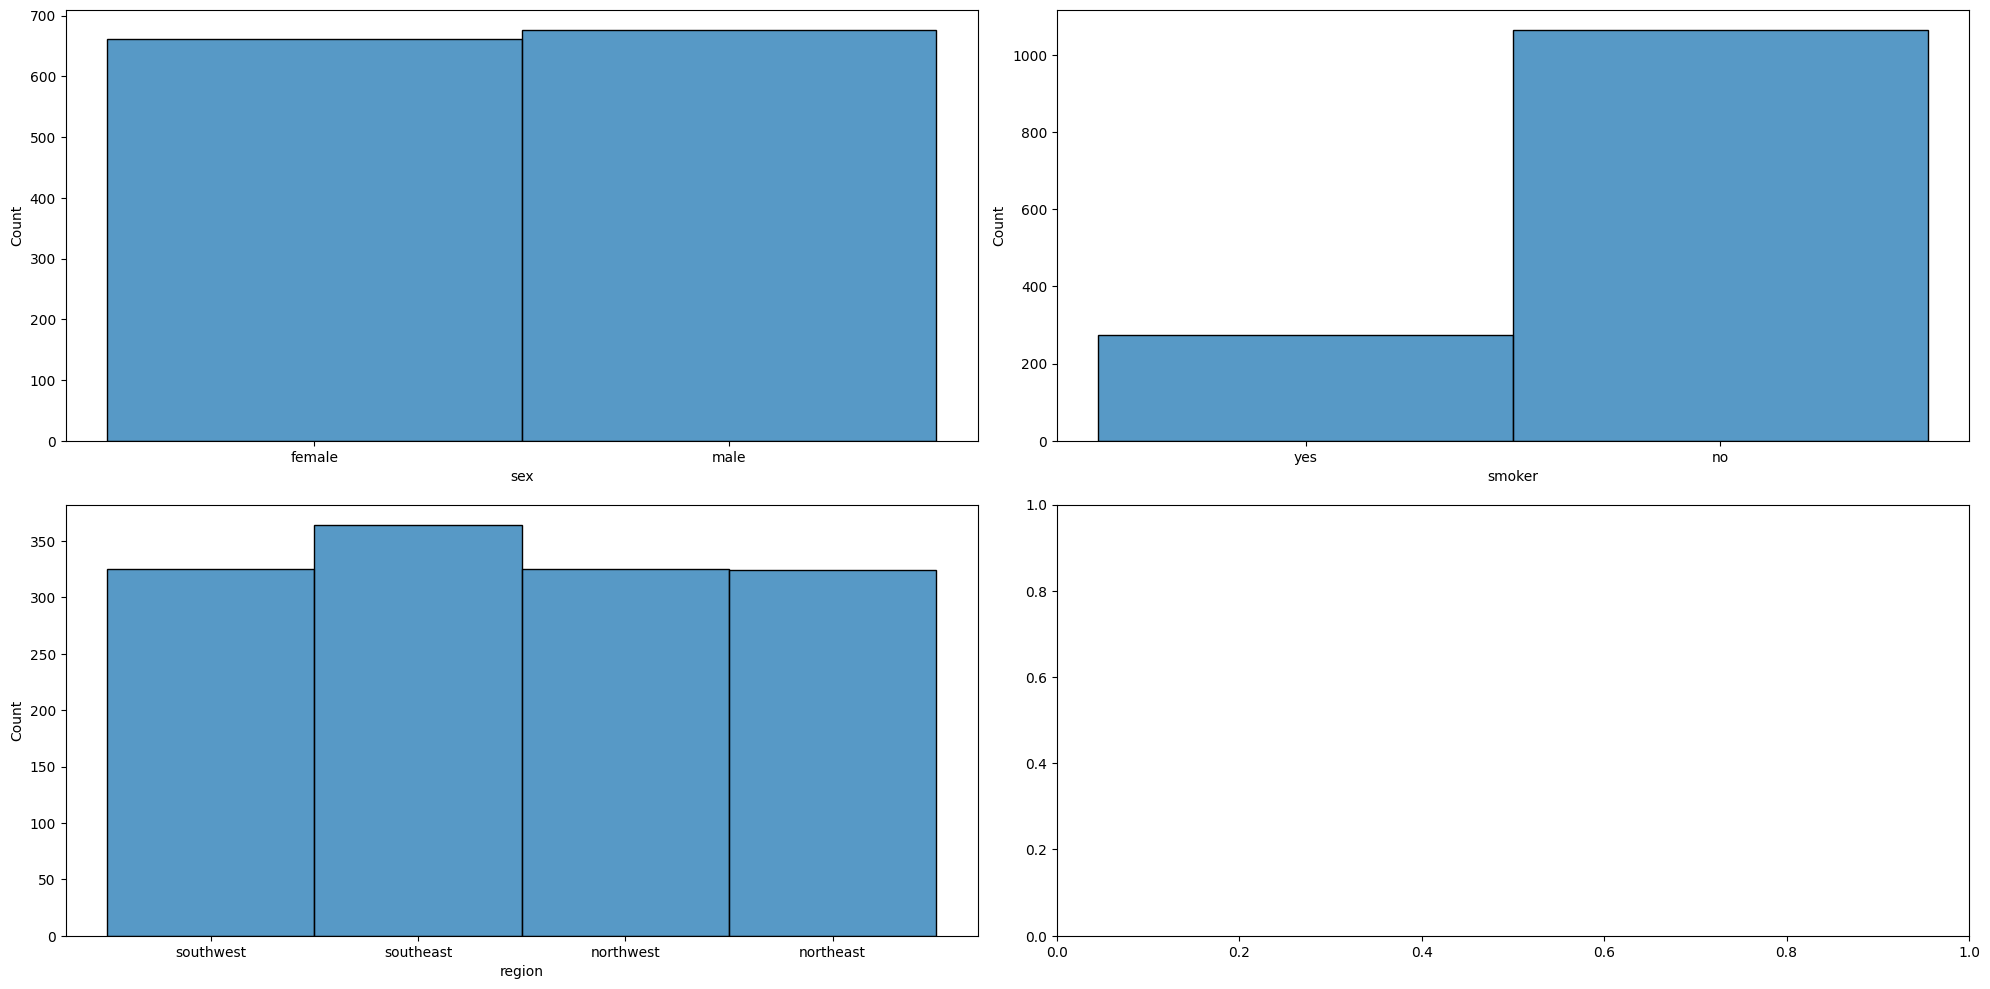

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize=(20, 10))

# Creamos los histogramas
sns.histplot(ax = axis[0,0], data = data, x = "sex")
sns.histplot(ax = axis[0,1], data = data, x = "smoker")
sns.histplot(ax = axis[1,0], data = data, x = "region")


# Ajustamos el diseño para que no se superpongan
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Con respecto a sexo hay aproximadamente los mismos hombres que mujeres; hay una proporcion mucho mayor de no fumadores que fumadores y las regiones tambien muy similares siendo del sureste algo mayor



*   Variables numéricas



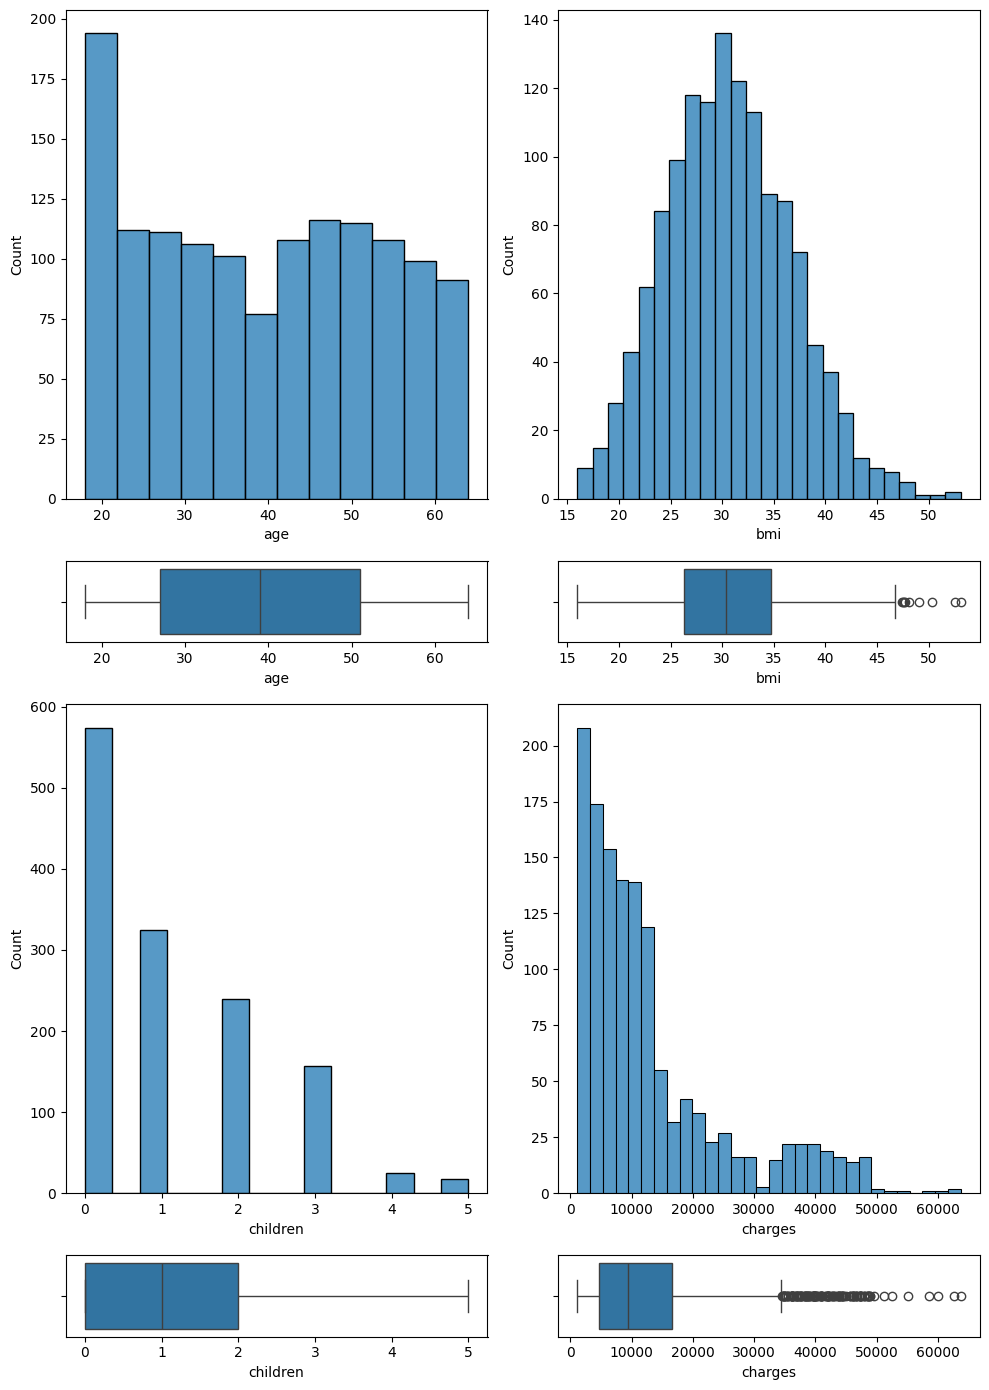

In [8]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "age")
sns.boxplot(ax = axis[1, 0], data = data, x = "age")

sns.histplot(ax = axis[0, 1], data = data, x = "bmi")
sns.boxplot(ax = axis[1,1], data = data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = data, x = "children")
sns.boxplot(ax = axis[3, 0], data = data, x = "children")

sns.histplot(ax = axis[2,1], data = data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = data, x = "charges")

plt.tight_layout()

plt.show()

Con respecto a edad predominan los de veintipocos, la media es algo inferior a 40 años y no tiene atipicos; el bmi sigue una distribucion normal con una pequeña colita a la derecha que se corresponde con los pocos datos atipicos; la mayoria no tienen hijos y el rango esta entre 0 y 5; charges contiene una gran cantidad de atipicos y su media es casi 10000.



*   Analisis multivariante





1.   Numericas con numericas



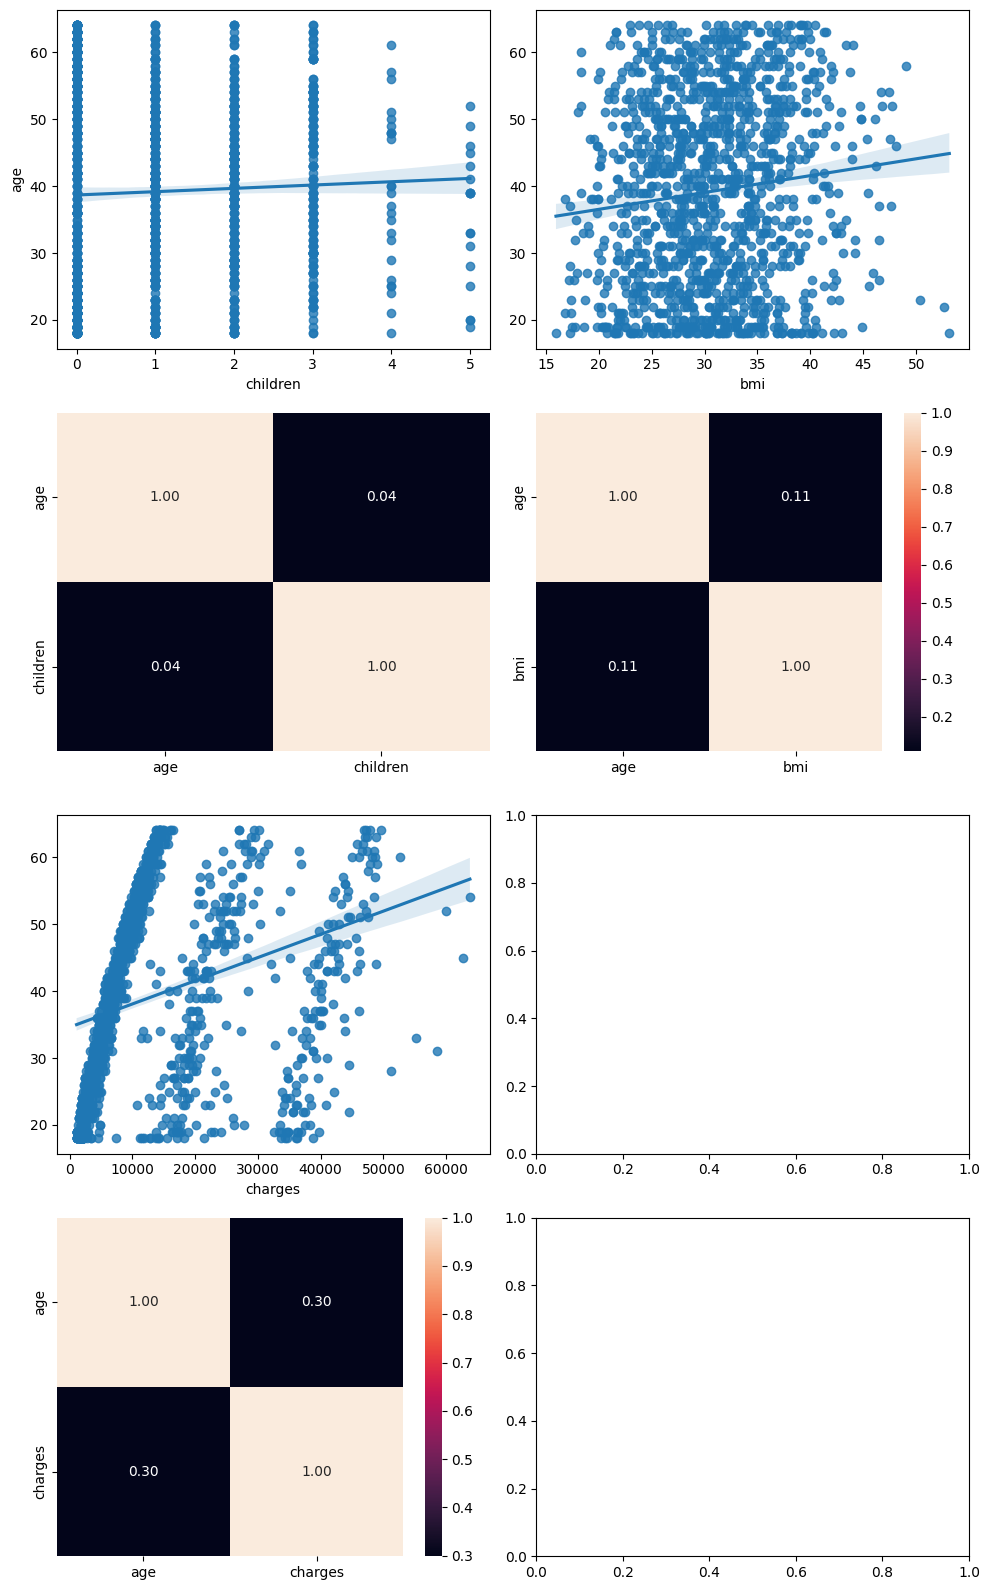

In [26]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data, x = "children", y = "age")
sns.heatmap(data[["age", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "bmi", y = "age").set(ylabel = None)
sns.heatmap(data[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "charges", y = "age").set(ylabel = None)
sns.heatmap(data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

plt.tight_layout()

plt.show()

El par de variables que tiene más correlación es charges con age.




2.   Categoricas con categoricas



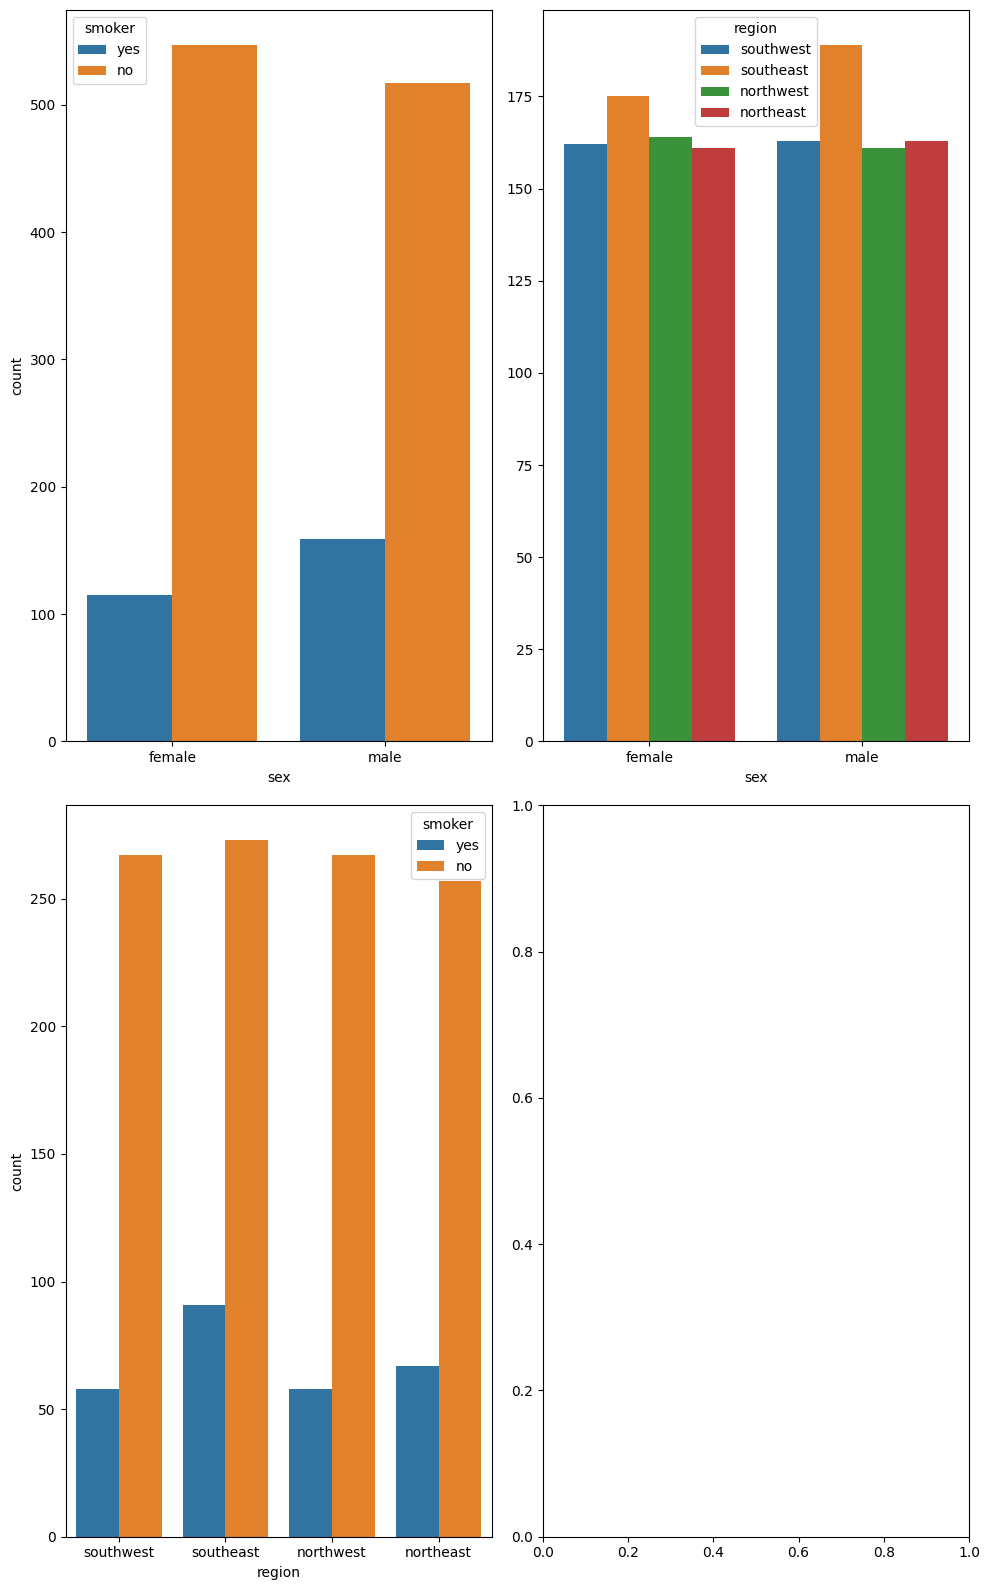

In [15]:
fig, axis = plt.subplots(2, 2, figsize = (10, 16))

sns.countplot(ax = axis[0, 0], data = data, x = "sex", hue = "smoker")

sns.countplot(ax = axis[0, 1], data = data, x = "sex", hue = "region").set(ylabel = None)

sns.countplot(ax = axis[1, 0], data = data, x = "region", hue = "smoker")


plt.tight_layout()

plt.show()

No hay nada relevante que sea significativo